# First attempt for using PETsys in Dubna Scintillating hodoscope (DuSci)
prototype: two Ketek 8x8 SiPM arrays coupled from the two sides of a box-shaped scintillator

triggers are cosmic 

last edit Oct-11 2020 (EOC)


In [39]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/analysis/Python'); 
from PETsys_analysis_tools import *;
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/DuSci/Figures/'
%config InlineBackend.figure_format = 'retina'

In [192]:
# CosmicCoinc = pd.read_csv('/Users/erezcohen/Desktop/PETsys/data/DuSci/BoxedScintillator/BoxScintillator_11102020_1000sec_coinc.dat')
CosmicCoinc = pd.read_csv('/Users/erezcohen/Desktop/data/PETsys/DuSi/TAU_60cm_scintillator/with_scintillator_no_laser_600sec_coinc.dat')

CosmicCoinc['abs_dt'] = np.abs(CosmicCoinc.time1-CosmicCoinc.time2)
CosmicCoinc['dt'] = CosmicCoinc.time1-CosmicCoinc.time2
CosmicCoinc[2:30]

,mh-n1,mh-j1,time1,e1,id1,mh-n2,mh-j2,time2,e2,id2,abs_dt,dt
2,2,0,22977109825423,1.314835,782,53,0,22977109821891,3.253777,572,3532,3532
3,2,0,30728309742519,1.150650,785,4,0,30728309743227,2.520206,572,708,-708
4,1,0,40180217586032,0.947338,791,1,0,40180217587284,2.621765,572,1252,-1252
5,23,0,50546512184807,2.531815,782,4,0,50546512190108,2.412815,572,5301,-5301
6,1,0,50820112675232,1.277435,782,1,0,50820112677758,1.366505,515,2526,-2526
7,15,0,59041202937888,1.606777,782,3,0,59041202942580,2.325958,572,4692,-4692
8,6,0,65130222035026,1.387562,782,16,0,65130222032233,3.481026,572,2793,2793
9,5,0,77968833274355,0.947445,782,1,0,77968833277918,2.322456,572,3563,-3563
10,31,0,149923346999930,2.354950,785,62,0,149923347000142,3.204468,572,212,-212
11,3,0,159968025620919,1.246311,796,6,0,159968025618460,2.359543,572,2459,2459


In [193]:
megaevent = 0
mh_n1 = CosmicCoinc['mh-n1'][0]
dt_array,abs_dt_array,ch1_array,ch2_array = [],[],[],[]
CosmicEvents = pd.DataFrame(columns={'mh_n1','mh_n2','dt_min_abs','ch1','ch2'});
Nmax = len(CosmicCoinc)
for i in np.arange(0,Nmax,1): # 90,1):#
    if CosmicCoinc['mh-n1'][i] != mh_n1: 
        mh_n1 = CosmicCoinc['mh-n1'][i]
        mh_n2 = CosmicCoinc['mh-n2'][i]
        megaevent = megaevent+1
        
        # time differences
        i_min_abs_dt = np.argmin(abs_dt_array);
        # average value of smallest 5/10 coincidence pairs
        sorted_index_array = np.argsort(abs_dt_array)
        index_smallest_10 = sorted_index_array[0:10]
        # print 'dt_array:',dt_array
        # print 'dt_array[i_min_abs_dt]:',dt_array[i_min_abs_dt]
        # print 'dt_array[sorted_index_array[0]]:',dt_array[sorted_index_array[0]]
        smallest_5, smallest_10 = [], []; 
        for smallestIdx in np.arange(0,min([len(index_smallest_10),10]),1):
            smallest_10.append(dt_array[index_smallest_10[smallestIdx]]); 
            if smallestIdx<5:
                smallest_5.append(dt_array[index_smallest_10[smallestIdx]]);
        i_min_abs_dt = sorted_index_array[-1]        
        CosmicEvents = CosmicEvents.append(pd.DataFrame({'mh_n1':mh_n1,
                                                         'mh_n2':mh_n2,
                                                         'dt_min_abs':dt_array[sorted_index_array[0]],
                                                         'mean_dt':np.mean(dt_array),
                                                         'mean_dt_smallest_5':np.mean(smallest_5),
                                                         'mean_dt_smallest_10':np.mean(smallest_10),
                                                         'ch1':ch1_array[i_min_abs_dt],
                                                         'ch2':ch2_array[i_min_abs_dt]}, 
                                                        index=[megaevent]), 
                                           ignore_index=True)
        dt_array = []
        abs_dt_array = []
        ch1_array = []
        ch2_array = []

    dt_array.append(float(CosmicCoinc['dt'][i]))        
    abs_dt_array.append(float(CosmicCoinc['abs_dt'][i]))
    ch1_array.append(float(CosmicCoinc['id1'][i]))
    ch2_array.append(float(CosmicCoinc['id2'][i]))
    if i%5000==0:  print 100.*float(i)/len(CosmicCoinc),'%'
print 'done.'        

0.0 %
done.


In [194]:
CosmicEvents[0:3]

,ch1,ch2,dt_min_abs,mean_dt,mean_dt_smallest_10,mean_dt_smallest_5,mh_n1,mh_n2
0,782.0,572.0,-2948.0,-2948.0,-2948.0,-2948.0,8,18
1,782.0,554.0,3757.0,3757.0,3757.0,3757.0,2,53
2,782.0,572.0,-708.0,1412.0,1412.0,1412.0,1,1


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  del sys.path[0]
/usr/local/lib/python2.7/site-packages/matplotlib/mlab.py:1541: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/usr/local/lib/python2.7/site-packages/matplotlib/mlab.py:1541: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


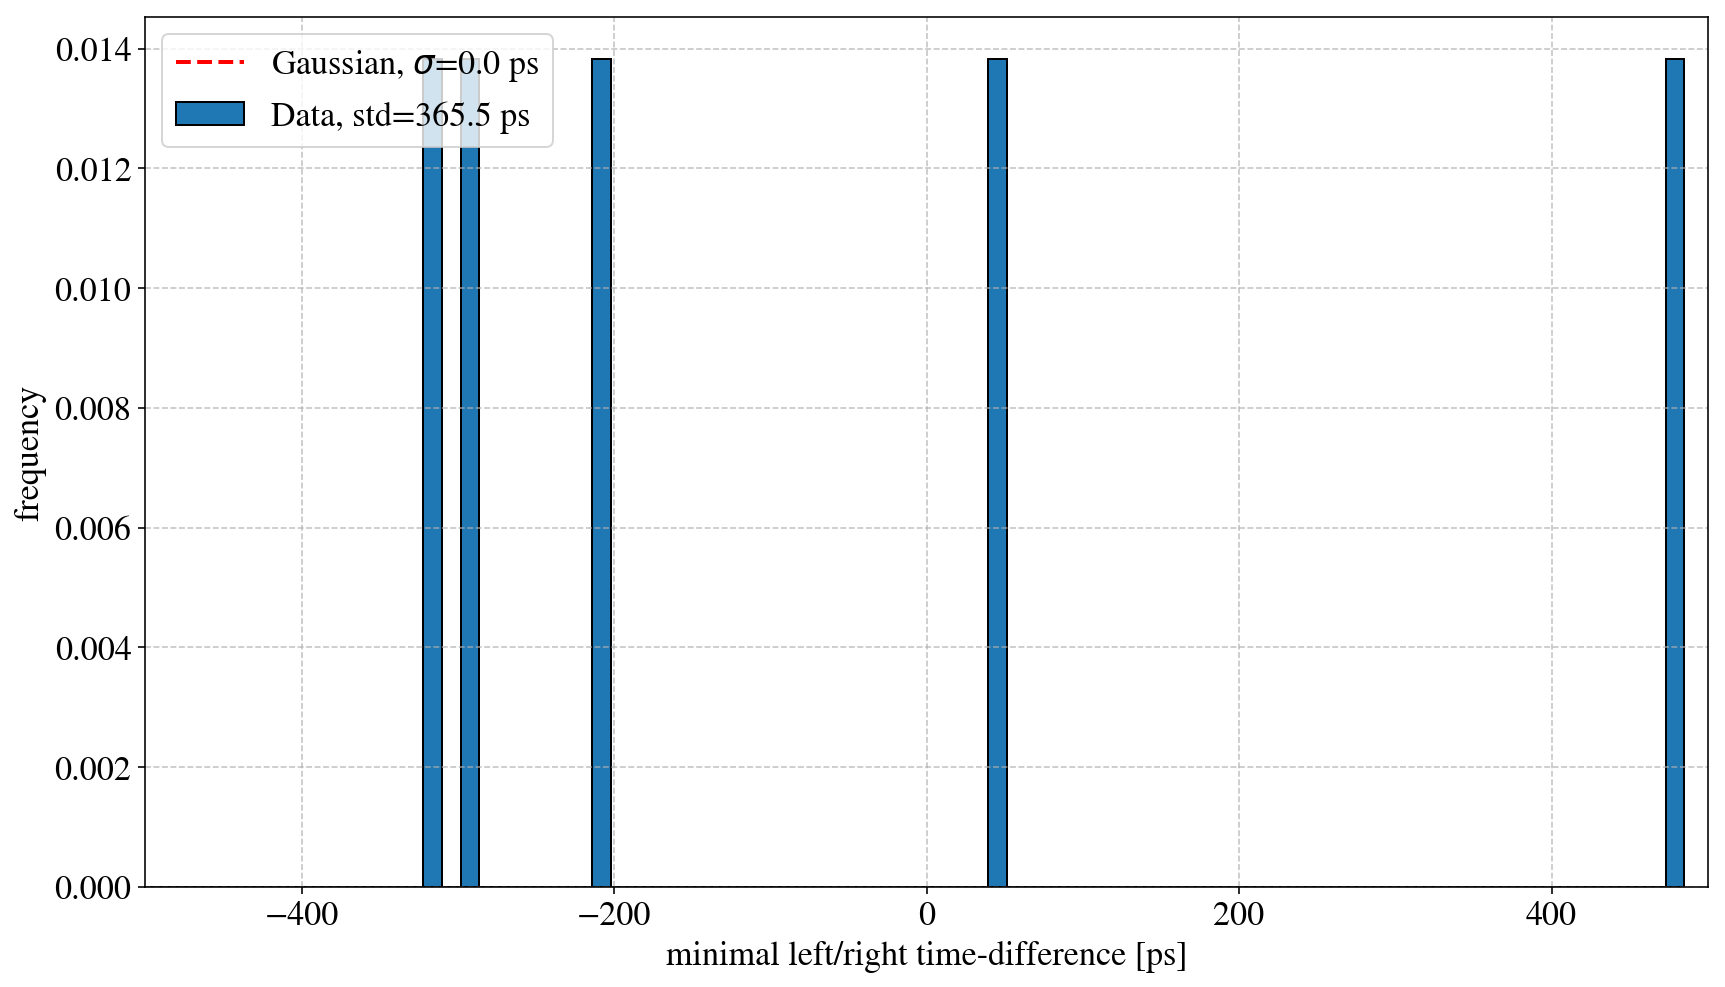

In [195]:
dt = np.array(CosmicEvents.dt_min_abs);
dt = dt[abs(dt)<1000] # omit outliers

mean_dt,std_dt = np.mean(dt),np.std(dt)
fig,ax=plt.subplots(figsize=(14,8));
histo,bins,patches = plt.hist(dt, bins=np.linspace(min(dt),max(dt),100), 
                              normed=1, edgecolor='black',label='Data, std=%.1f ps'%np.std(dt));


(mu, sigma) = norm.fit(dt[abs(dt)<100])
# add a 'best fit' line
x_fit = np.linspace(min(dt),max(dt),1000)
y_fit = mlab.normpdf( x_fit, mu, sigma)
l = plt.plot(x_fit, y_fit, 'r--', linewidth=2,label='Gaussian, $\sigma$=%.1f ps'%(sigma))

set_axes(ax=ax,x_label='minimal left/right time-difference [ps]',y_label='frequency',#          title='mean=%.1f, std=%.1f ps'%(mean_dt,std_dt),
         xlim=(-500,500),fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='upper left');

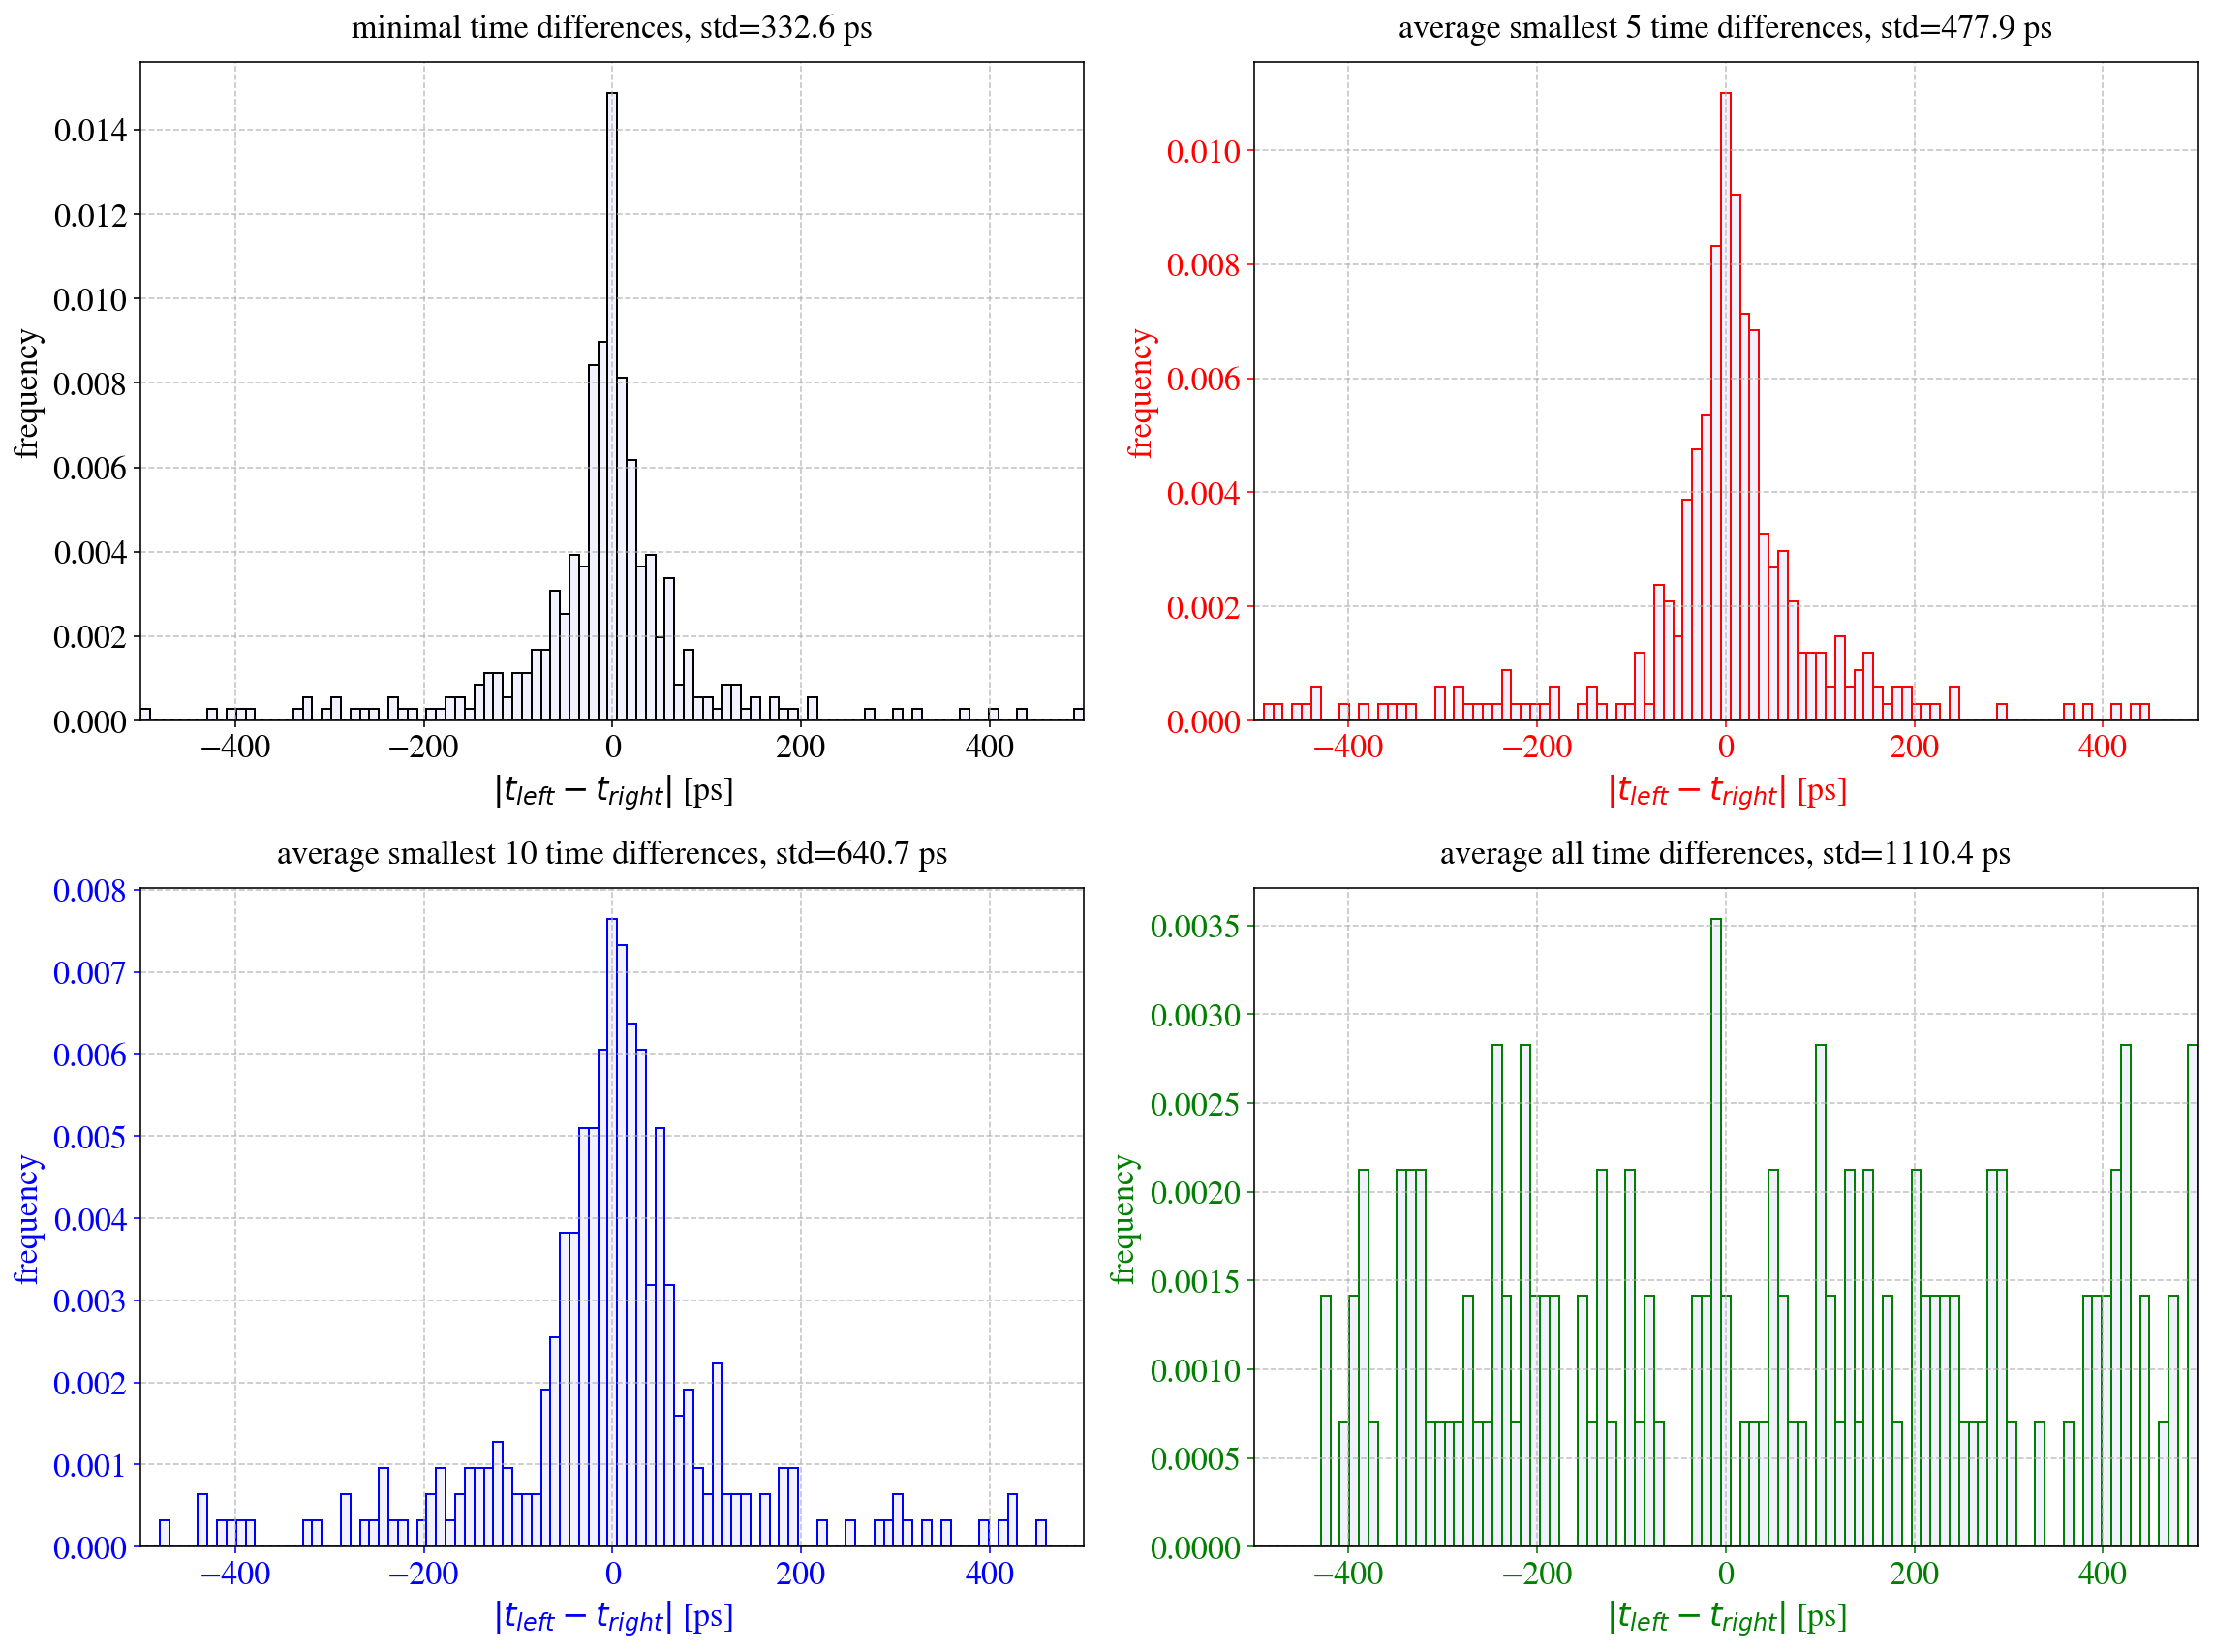

In [189]:
# dt = np.array(CosmicEvents.dt_min_abs);
# dt = dt[abs(dt)<1000] # omit outliers
bins=np.linspace(-500,500,100)

# mean_dt,std_dt = np.mean(dt),np.std(dt)
colors = {'r','g','b','k'}
fig=plt.figure(figsize=(16,12));
for i,color,dt,datalabel in zip([1,2,3,4],
                                colors,                          
                                [CosmicEvents.dt_min_abs,CosmicEvents.mean_dt_smallest_5,CosmicEvents.mean_dt_smallest_10,CosmicEvents.mean_dt],                   
                                ['minimal time differences','average smallest 5 time differences','average smallest 10 time differences','average all time differences']):
    ax=fig.add_subplot(2,2,i)
    histo,bins,patches = plt.hist( dt, bins=bins , fc=(0, 0, 1, 0.05), normed=1, edgecolor=color);
    set_axes(ax=ax,x_label='$|t_{left} - t_{right}|$ [ps]',y_label='frequency',ticks_color=color,
             title=datalabel+', std=%.1f ps'%np.std(dt),
             xlim=(-500,500),fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='upper left');
plt.tight_layout()

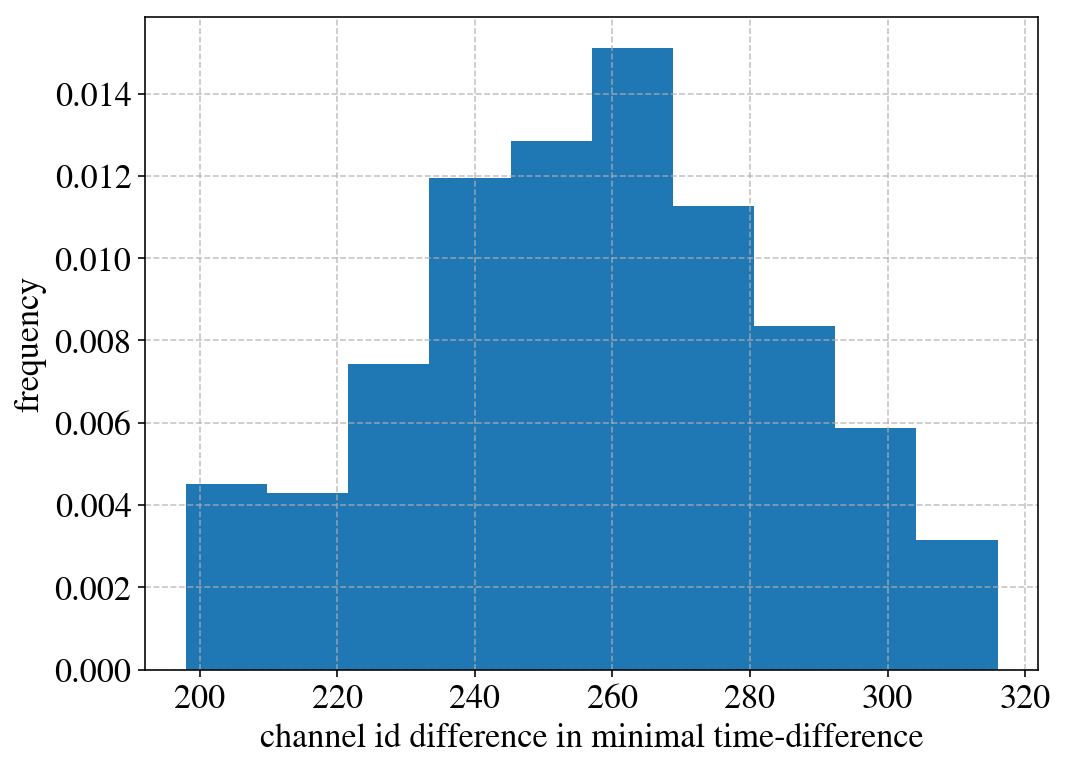

In [111]:
# verify that the coincidence is indeed left-right and not within the same SiPM array
fig,ax=plt.subplots(figsize=(8,6));
plt.hist(CosmicEvents.ch1 - CosmicEvents.ch2, normed=1)
set_axes(ax=ax,x_label='channel id difference in minimal time-difference',y_label='frequency',
         fontsize=17,do_add_grid=True);

# arxiv

In [8]:
CosmicSingles = pd.read_csv('/Users/erezcohen/Desktop/PETsys/data/DuSci/BoxedScintillator/BoxScintillator_11102020_1000sec_single.dat')

In [13]:
CosmicSingles_R = CosmicSingles[(CosmicSingles.channel>255)&(CosmicSingles.channel<321)]
CosmicSingles_L = CosmicSingles[(CosmicSingles.channel>0)&(CosmicSingles.channel<64)]

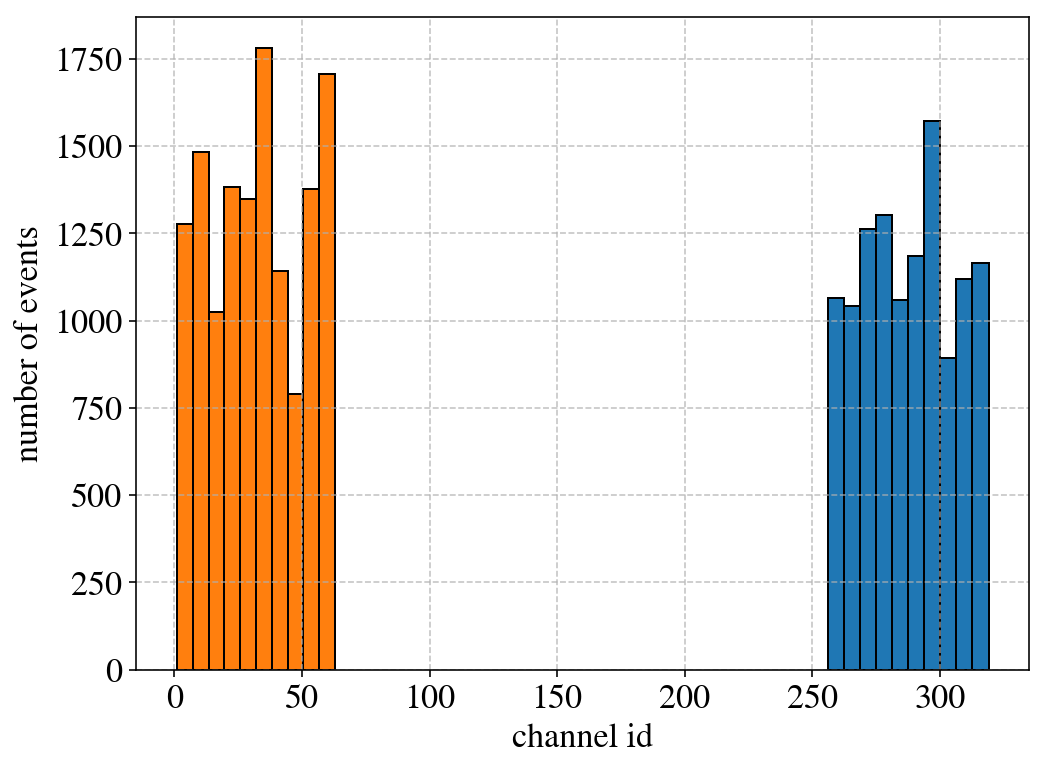

In [14]:
fig,ax=plt.subplots(figsize=(8,6));
plt.figure;
plt.hist(CosmicSingles_R.channel,edgecolor='black')
plt.hist(CosmicSingles_L.channel,edgecolor='black')
set_axes(ax=ax,x_label='channel id',y_label='number of events',
         fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

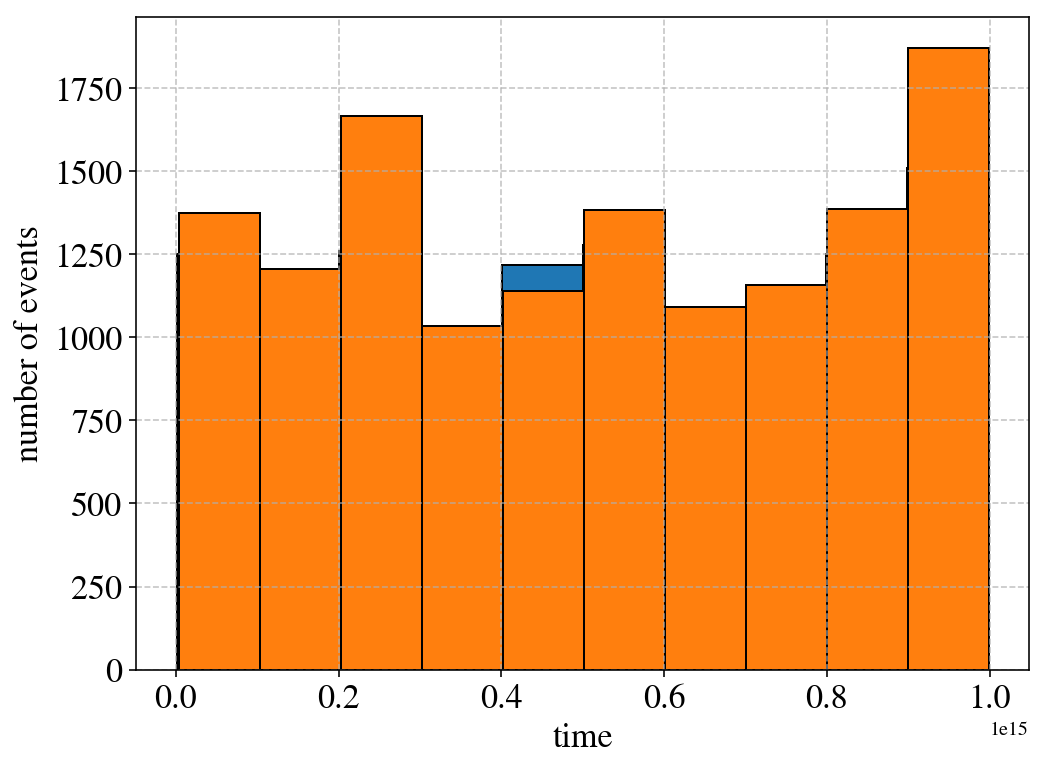

In [15]:
fig,ax=plt.subplots(figsize=(8,6));
plt.figure;
plt.hist(CosmicSingles_R.Time,edgecolor='black')
plt.hist(CosmicSingles_L.Time,edgecolor='black')
set_axes(ax=ax,x_label='time',y_label='number of events',
         fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

In [19]:
for i_R,row_R in CosmicSingles_R.iterrows():
    t_R = row_R['Time']
    ch_R = row_R['channel']

    for i_L,row_L in CosmicSingles_L.iterrows():
        t_L = row_L['Time']
        ch_L = row_L['channel']

        dt = np.abs(t_R-t_L)
        if dt<1e4:
            print 'diff: ', dt/1000, ' ps'

4082
454
1610
2680
3335
3448
2310
3284
2699
2509
4684
3396
3018
2951
2998
2169
2654
2785
3456
3051
2915
2799
2863
2334
2828
1897
2038
2726
2265
1658
2466
2166
1048
4261
1367
2018
3150
2274
2786
3363
2658
3784
1232
2191
2170
1630
788
3748
1684
614
41
154
984
10
595
785
1390
102
276
343
296
1125
640
509
162
243
379
495
431
960
466
1397
1256
568
1029
1636
828
1128
2246
7555
1927
1276
144
1020
508
69
636
490
2062
1103
1124
1664
2159
2377
313
757
1412
1525
387
1361
776
586
2761
1473
1095
1028
1075
246
731
862
1533
1128
992
876
940
411
905
26
115
803
342
265
543
243
875
6184
556
95
1227
351
863
1440
735
1861
691
268
247
293
624
3912
1848
778
123
10
1148
174
759
949
1226
62
440
507
460
1289
804
673
2
407
543
659
595
1124
630
1561
1420
732
1193
1800
992
1292
2410
7719
2091
1440
308
1184
672
95
800
326
2226
1267
1288
1828
1013
3523
1459
389
266
379
759
215
370
560
1615
327
51
118
71
900
415
284
387
18
154
270
206
735
241
1172
1031
343
804
1411
603
903
2021
7330
1702
1051
81
795
283
294
411
715


KeyboardInterrupt: 

In [16]:
CosmicGroups = pd.read_csv('/Users/erezcohen/Desktop/PETsys/data/DuSci/BoxedScintillator/BoxScintillator_11102020_1000sec_group.dat')

In [17]:
CosmicGroups

,mh_n,mh_j,Time,charge,channel
0,1,0,1413927529426,2.936680,306
1,4,0,4053817871791,3.648018,42
2,4,1,4053817871461,2.693401,44
3,4,2,4053817873120,1.892166,43
4,4,3,4053817873720,1.289520,51
5,1,0,6882638889682,1.867821,60
6,46,0,7710056904521,1.511353,58
7,46,1,7710056904152,1.503544,8
8,46,2,7710056904101,1.419201,9
9,46,3,7710056904485,1.343018,62
